In [146]:
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
from matplotlib import figure
import seaborn as sns

conn = sqlite3.connect('spotify.db')

top_10_artists_query = """
    SELECT 
        * 
    FROM vw_top_artists
    LIMIT 10
"""
artist_tempos_query = """
    SELECT 
        artist_name, 
        tempo
    FROM artist ar 
    JOIN album al ON ar.artist_id = al.artist_id
    JOIN track t ON al.album_id = t.album_id
    JOIN track_feature tf ON tf.track_id = t.track_id
"""
track_feature_query = """
    SELECT * FROM track_feature 
"""
genre_feature_query = """
    SELECT 
        ar.genre,
        t.track_id,
        danceability,
        energy,
        instrumentalness,
        liveness,
        speechiness,
        valence,
        loudness
    FROM artist ar 
    JOIN album al ON ar.artist_id = al.artist_id
    JOIN track t ON al.album_id = t.album_id
    JOIN track_feature tf ON tf.track_id = t.track_id
    WHERE GENRE in ('bedroom pop', 'ambient', 'alternative hip hop')
"""


top_10_artists = pd.read_sql_query(top_10_artists_query, conn)
artist_tempos = pd.read_sql_query(artist_tempos_query, conn)
track_feature = pd.read_sql_query(track_feature_query, conn)
genre_feature = pd.read_sql_query(genre_feature_query, conn)

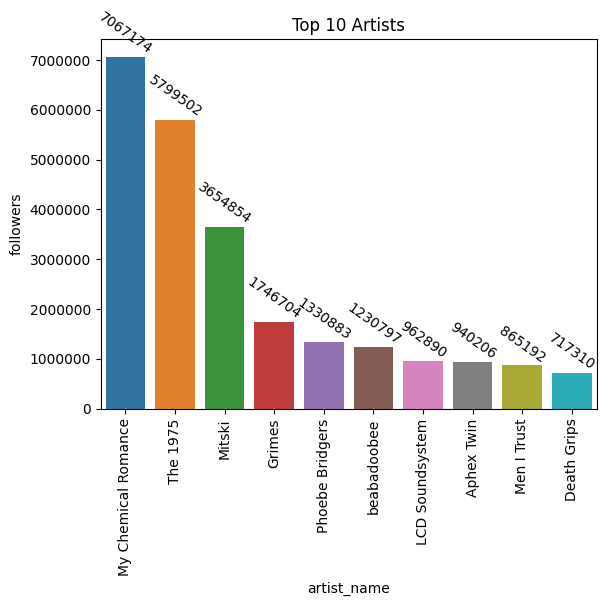

In [147]:
bp = sns.barplot(x = top_10_artists.artist_name, y = top_10_artists.followers)
_ = bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)
_ = bp.set(title='Top 10 Artists')
_ = bp.ticklabel_format(style='plain', axis='y')

for i in bp.containers:
    bp.bar_label(i, fmt = '%d', rotation=-35)

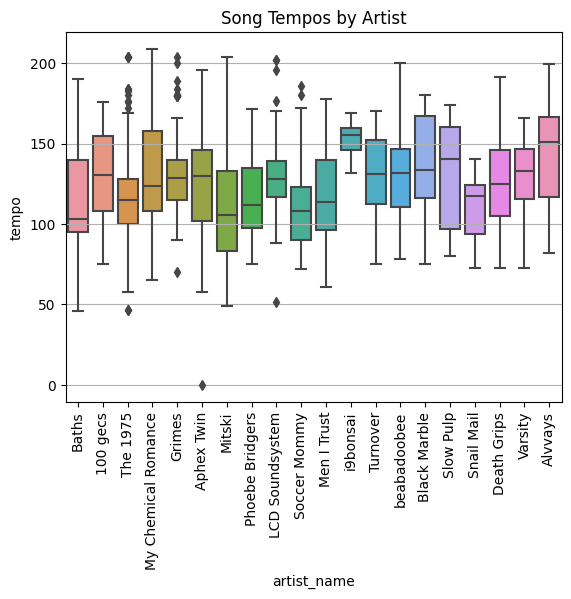

In [148]:
bw = sns.boxplot(x = artist_tempos.artist_name, y = artist_tempos.tempo)
_ = bw.set_xticklabels(bw.get_xticklabels(),rotation = 90)
bw.set(title='Song Tempos by Artist')
bw.ticklabel_format(style='plain', axis='y')
bw.yaxis.grid(True)

/var/folders/mt/pg1td8b17gb5n5x76ltr9fgh0000gn/T/ipykernel_22495/1576464170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = track_feature.corr().stack().reset_index(name="correlation")


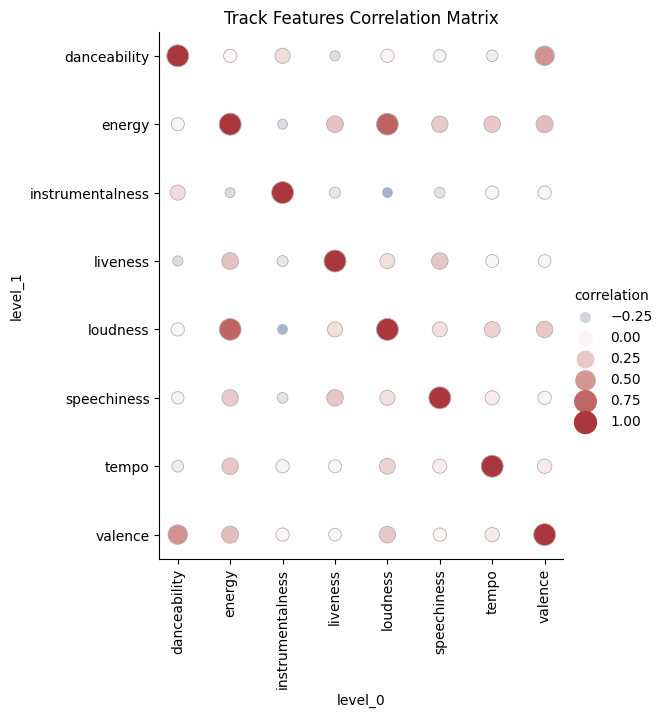

In [149]:
corr_mat = track_feature.corr().stack().reset_index(name="correlation")

cm = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=6, sizes=(50, 250), size_norm=(-.2, .8),
)
cm.set_xticklabels(rotation = 90)
cm.set(title='Track Features Correlation Matrix')

[Text(0.5, 1.0, 'Loudness vs. Valence')]

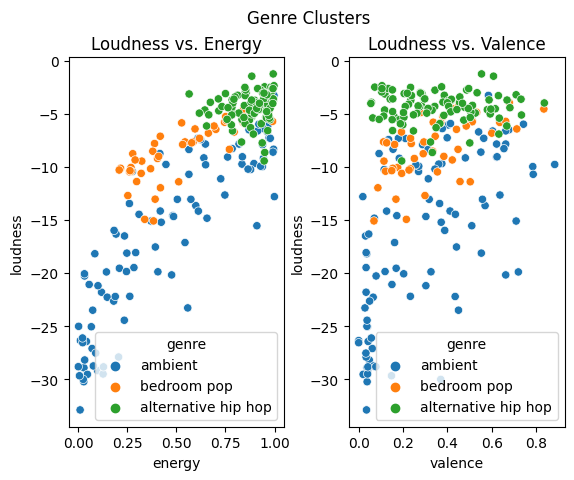

In [150]:
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 0.3)
fig.suptitle('Genre Clusters')

sc1 = sns.scatterplot(x=genre_feature.energy, y=genre_feature.loudness, hue=genre_feature.genre, ax=axes[0])
sc1.set(title='Loudness vs. Energy')

sc2 = sns.scatterplot(x=genre_feature.valence, y=genre_feature.loudness, hue=genre_feature.genre, ax=axes[1])
sc2.set(title='Loudness vs. Valence')